In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

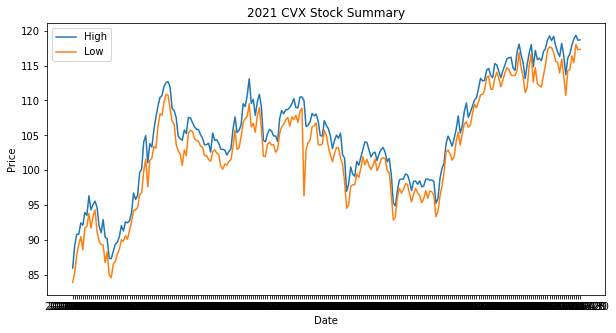

In [17]:
### Generating Plot to Describe the Stock Data
CVX_df = pd.read_csv("../data/ChevronStock2021.csv")
x = CVX_df['Date']
y = CVX_df['High']
z = CVX_df['Low']

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, label='High')  
ax.plot(x, z, label='Low')  
ax.set_xlabel('Date')  
ax.set_ylabel('Price')  
ax.set_title('2021 CVX Stock Summary')  
ax.legend();  
plt.savefig('../figures/fig1.pdf')

In [25]:
# Doing Analysis with our Fetures of Interest
keeplist = ['Date','High','Low']
summedstockdf = CVX_df[keeplist]
print(summedstockdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB
None


In [28]:
#creating some summary statistics 
summedstockdf.describe()

,High,Low
count,251.000000,251.000000
mean,105.196175,103.091753
std,7.747654,7.814207
min,85.949997,83.889999
25%,99.900002,97.724998
50%,105.080002,102.970001
75%,110.330002,107.969998
max,119.339996,118.040001


In [36]:
max_idx_H = summedstockdf['High'].idxmax()
max_idx_L = summedstockdf['Low'].idxmax()
min_idx_H = summedstockdf['High'].idxmin()
min_idx_L = summedstockdf['Low'].idxmin()
print("Best and Worst Date for Chevron Stock(Highs):")
print("Highest",summedstockdf.iloc[max_idx_H]['Date'])
print("Lowest", summedstockdf.iloc[min_idx_H]['Date'])
print("Best and Worst Date for Chevron Stock(Lows):")
print("Highest",summedstockdf.iloc[max_idx_L]['Date'])
print("Lowest", summedstockdf.iloc[min_idx_L]['Date'])
###Onaji ty-

Best and Worst Date for Chevron Stock(Highs):
Highest 2021-12-28
Lowest 2021-01-04
Best and Worst Date for Chevron Stock(Lows):
Highest 2021-12-28
Lowest 2021-01-04


In [40]:
mergeddf = pd.read_csv("../data/merged.csv")
mergeddf.head()

,Date,Tweet ID,Text,Username,sentiment,label,score,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,1377765449077829646,@ltgrusselhonore @Baton @bp @exxonmobil @Chevr...,Fess1970,"[{'label': 'NEGATIVE', 'score': 0.961742639541...",NEGATIVE,0.961743,105.260002,105.860001,104.209999,105.75,99.121391,8515800
1,2021-04-01,1377762433461231617,if we lived in a just and honorable world ever...,buhbuhballin,"[{'label': 'NEGATIVE', 'score': 0.945913970470...",NEGATIVE,0.945914,105.260002,105.860001,104.209999,105.75,99.121391,8515800
2,2021-04-01,1377752643876098053,Committing to zero routine flaring by 2025 wil...,EDFEnergyEX,"[{'label': 'NEGATIVE', 'score': 0.999148964881...",NEGATIVE,0.999149,105.260002,105.860001,104.209999,105.75,99.121391,8515800
3,2021-04-01,1377745681134198789,Does Chevron spend 98% of its worth on dirty o...,jenkrill,"[{'label': 'NEGATIVE', 'score': 0.995059728622...",NEGATIVE,0.995060,105.260002,105.860001,104.209999,105.75,99.121391,8515800
4,2021-04-01,1377742656160284677,@SDonziger @DavidYankovich Is Chevron the Russ...,Jackie1Connolly,"[{'label': 'NEGATIVE', 'score': 0.996746778488...",NEGATIVE,0.996747,105.260002,105.860001,104.209999,105.75,99.121391,8515800


In [39]:
mergeddf['score'].describe()

count    1160.000000
mean        0.960652
std         0.086946
min         0.500485
25%         0.974087
50%         0.992183
75%         0.997086
max         0.999799
Name: score, dtype: float64

In [47]:
keeplist = ['High','score']
corrdf = mergeddf[keeplist]
cornum = corrdf.corr(method='kendall')
print(cornum)

           High     score
High   1.000000 -0.009447
score -0.009447  1.000000


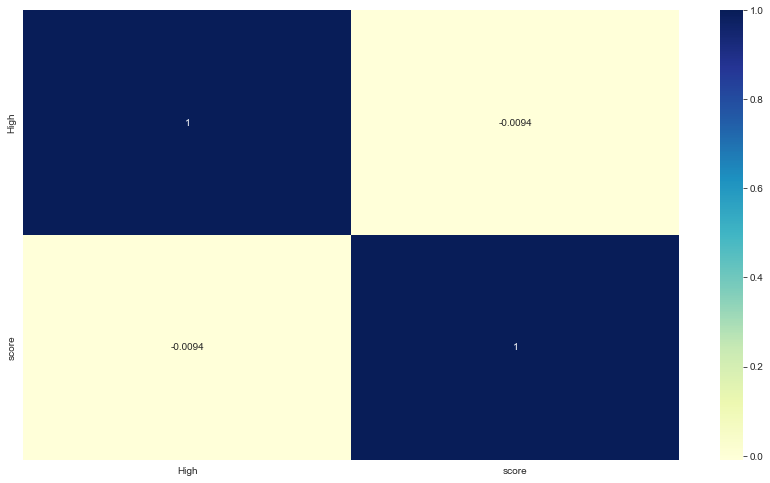

In [60]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
rcParams['figure.figsize'] = 14.7,8.27

svn = sb.heatmap(cornum, 
           xticklabels=cornum.columns.values, 
           yticklabels=cornum.columns.values, 
           cmap="YlGnBu",
          annot=True)

figure = svn.get_figure()    
figure.savefig('../figures/fig2.pdf', dpi=400)